In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns


In [3]:
POOL_ALL = ['starter-card', 'recruit-season', 'pool-1', 'pool-2', 'pool-3', 'collection-level']
POOL_1 = ['starter-card', 'recruit-season', 'pool-1']
POOL_2 = ['starter-card', 'recruit-season', 'pool-1', 'pool-2']
POOL_3 = ['starter-card', 'recruit-season', 'pool-1', 'pool-2', 'pool-3']

ANALYSIS_COST_POWER_COLUMNS = ['cost', 'power', 'source_slug']

In [4]:
cards_df = pd.read_parquet('data/cards.parquet', engine='fastparquet')

# References

1. https://stackoverflow.com/questions/17578115/pass-percentiles-to-pandas-agg-function

In [5]:
def percentile(n):
    def percentile_(x):
        return round(np.percentile(x, n))
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [6]:
cards_df[cards_df.source_slug.isin(POOL_3)]

,cid,name,type,cost,power,ability,flavor,art,alternate_art,url,status,carddefid,source,source_slug,rarity,rarity_slug,difficulty
1,43,Colossus,Character,2,3,"<span>Ongoing</span>: Can't be destroyed, move...",,https://marvelsnapzone.com/wp-content/themes/b...,,https://marvelsnapzone.com/cards/colossus,released,Colossus,Recruit Season,recruit-season,,,
2,91,Groot,Character,3,4,<span>On Reveal</span>: If your opponent playe...,,https://marvelsnapzone.com/wp-content/themes/b...,,https://marvelsnapzone.com/cards/groot,released,Groot,Collection Level 18-214 (Pool 1),pool-1,,,
4,103,Human Torch,Character,1,2,"When this moves, double its Power.",,https://marvelsnapzone.com/wp-content/themes/b...,,https://marvelsnapzone.com/cards/human-torch,released,HumanTorch,Collection Level 486+ (Pool 3),pool-3,,,
9,145,Maximus,Character,3,7,<span>On Reveal</span>: Your opponent draws 2 ...,,https://marvelsnapzone.com/wp-content/themes/b...,,https://marvelsnapzone.com/cards/maximus,released,Maximus,Collection Level 486+ (Pool 3),pool-3,,,
11,185,Okoye,Character,2,2,<span>On Reveal</span>: Give every card in you...,,https://marvelsnapzone.com/wp-content/themes/b...,,https://marvelsnapzone.com/cards/okoye,released,Okoye,Collection Level 222-474 (Pool 2),pool-2,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,193,Polaris,Character,3,5,<span>On Reveal</span>: Move an opposing 1 or ...,,https://marvelsnapzone.com/wp-content/themes/b...,,https://marvelsnapzone.com/cards/polaris,released,Polaris,Collection Level 486+ (Pool 3),pool-3,,,
241,205,Rhino,Character,3,3,<span>On Reveal</span>: Ruin this location. (r...,,https://marvelsnapzone.com/wp-content/themes/b...,,https://marvelsnapzone.com/cards/rhino,released,Rhino,Collection Level 222-474 (Pool 2),pool-2,,,
242,212,Sabretooth,Character,3,4,"When this is destroyed, return it to your hand...",,https://marvelsnapzone.com/wp-content/themes/b...,,https://marvelsnapzone.com/cards/sabretooth,released,Sabretooth,Collection Level 222-474 (Pool 2),pool-2,,,
243,224,Shang-Chi,Character,4,3,<span>On Reveal</span>: Destroy all enemy card...,,https://marvelsnapzone.com/wp-content/themes/b...,,https://marvelsnapzone.com/cards/shang-chi,released,ShangChi,Collection Level 222-474 (Pool 2),pool-2,,,


# Note

Remove negative power skew

```python
cards.source_slug.isin(pools)) & (cards.power >= 0)
```


In [7]:
cards_df[(cards_df.source_slug.isin(POOL_3)) & (cards_df.status == 'released')]\
   .groupby(['cost'])\
   .agg({'power': ['count','min','median','max']})

power               
     count min median max
cost                     
0        2   1    1.5   2
1       24  -2    2.0   7
2       40   0    2.0   5
3       38  -3    3.0   7
4       24  -1    4.0  10
5       22  -8    5.0  15
6       15   0    8.0  20
9        1  12   12.0  12

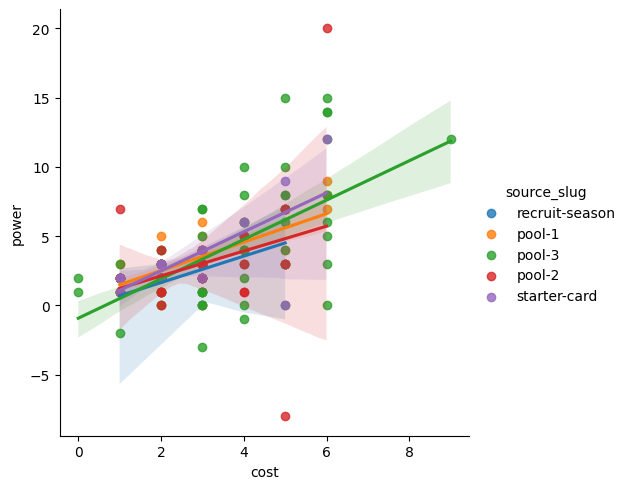

In [8]:
current_pool = cards_df[ANALYSIS_COST_POWER_COLUMNS][(cards_df.source_slug.isin(POOL_3)) & (cards_df.status == 'released')]
sns.lmplot(x='cost', y='power', hue='source_slug', data=current_pool)

<AxesSubplot: xlabel='cost', ylabel='power'>

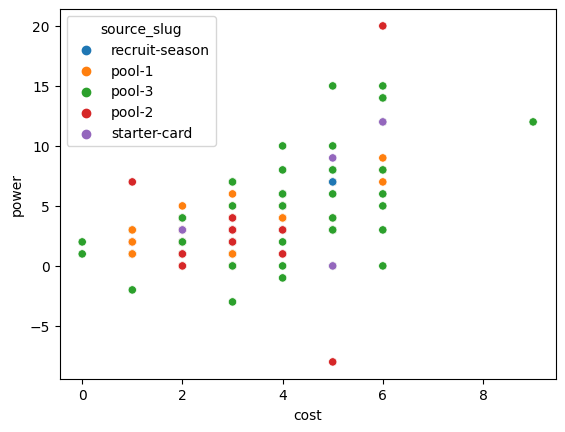

In [9]:
sns.scatterplot(x='cost', y='power', hue='source_slug', data=current_pool)

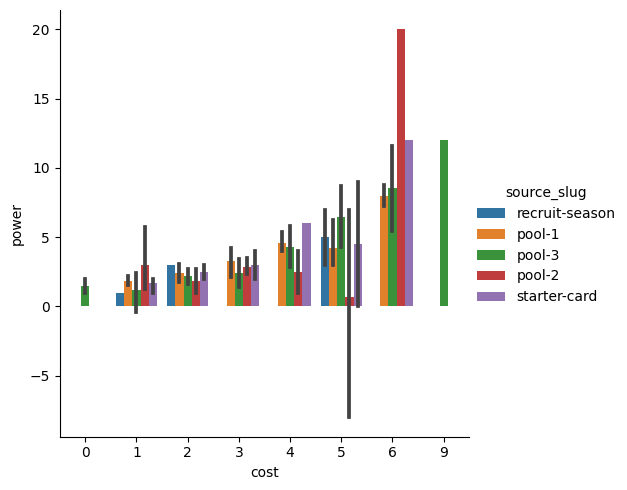

In [10]:
sns.catplot(x='cost', y='power', hue='source_slug', kind='bar', data=current_pool)

<AxesSubplot: xlabel='power', ylabel='source_slug'>

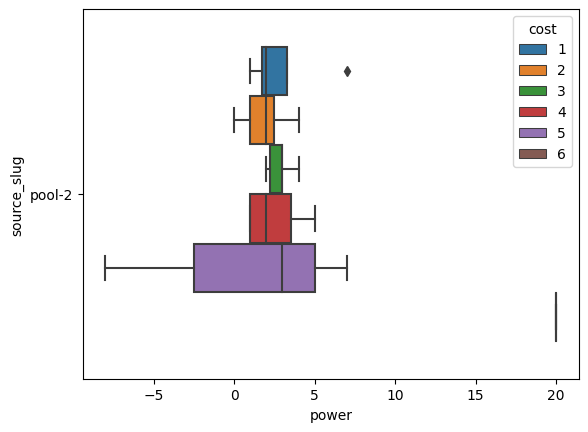

In [11]:
_data = current_pool[(current_pool.source_slug == 'pool-2')]
sns.boxplot(x='power', y='source_slug', hue='cost', data=_data)

In [12]:
cards_df[(cards_df.power > 10) & (cards_df.status == 'released')]

,cid,name,type,cost,power,ability,flavor,art,alternate_art,url,status,carddefid,source,source_slug,rarity,rarity_slug,difficulty
47,61,Destroyer,Character,6,15,<span>On Reveal</span>: Destroy your other cards.,,https://marvelsnapzone.com/wp-content/themes/b...,,https://marvelsnapzone.com/cards/destroyer,released,Destroyer,Collection Level 486+ (Pool 3),pool-3,,,
72,57,Death,Character,9,12,Costs 1 less for each card destroyed this game.,,https://marvelsnapzone.com/wp-content/themes/b...,,https://marvelsnapzone.com/cards/death,released,Death,Collection Level 486+ (Pool 3),pool-3,,,
79,141,Magneto,Character,6,12,<span>On Reveal</span>: Move all opposing 3 an...,,https://marvelsnapzone.com/wp-content/themes/b...,,https://marvelsnapzone.com/cards/magneto,released,Magneto,Collection Level 486+ (Pool 3),pool-3,,,
119,203,Red Skull,Character,5,15,<span>Ongoing</span>: Enemy cards at this loca...,,https://marvelsnapzone.com/wp-content/themes/b...,,https://marvelsnapzone.com/cards/red-skull,released,RedSkull,Collection Level 486+ (Pool 3),pool-3,,,
125,5,Agatha Harkness,Character,6,14,Agatha starts in your hand and plays your card...,,https://marvelsnapzone.com/wp-content/themes/b...,,https://marvelsnapzone.com/cards/agatha-harkness,released,AgathaHarkness,Collection Level 486+ (Pool 3),pool-3,,,
132,87,Giganto,Character,6,14,You can only play this at the left location.,,https://marvelsnapzone.com/wp-content/themes/b...,,https://marvelsnapzone.com/cards/giganto,released,Giganto,Collection Level 486+ (Pool 3),pool-3,,,
153,264,The Infinaut,Character,6,20,"If you played a card last turn, you can't play...",,https://marvelsnapzone.com/wp-content/themes/b...,,https://marvelsnapzone.com/cards/the-infinaut,released,Infinaut,Collection Level 222-474 (Pool 2),pool-2,,,
210,101,Hulk,Character,6,12,,HULK SMASH!,https://marvelsnapzone.com/wp-content/themes/b...,,https://marvelsnapzone.com/cards/hulk,released,Hulk,Starter Card,starter-card,,,


In [16]:
cards_df[(cards_df.cost > 8) & (cards_df.status == 'released')]

,cid,name,type,cost,power,ability,flavor,art,alternate_art,url,status,carddefid,source,source_slug,rarity,rarity_slug,difficulty
72,57,Death,Character,9,12,Costs 1 less for each card destroyed this game.,,https://marvelsnapzone.com/wp-content/themes/b...,,https://marvelsnapzone.com/cards/death,released,Death,Collection Level 486+ (Pool 3),pool-3,,,
